Import packages

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
import datetime as dt

Import data

In [26]:
df = pds.read_csv('../../bus203_all_labelled.csv')

One hot encode segments, normalize columns and create final dataset

In [77]:
# Make segments categorical
dataset = pds.get_dummies(df['segment_number'])

# Combine segments, timestamps and time from journey start

# Cyclical timestamps 
dataset['hr_sin'] = np.sin(df.timestamp.str[11:13].astype(int)*(2.*np.pi/24))
dataset['hr_cos'] = np.cos(df.timestamp.str[11:13].astype(int)*(2.*np.pi/24))

dataset['time_since_journey_start'] = (df['time_since_journey_start']-df['time_since_journey_start'].min())/(df['time_since_journey_start'].max()-df['time_since_journey_start'].min())
#dataset['latitude'] = (df['latitude']-df['latitude'].min())/(df['latitude'].max()-df['latitude'].min())
#dataset['longitude'] = (df['longitude']-df['longitude'].min())/(df['longitude'].max()-df['longitude'].min())

Divide training and test data, 80% training data

In [68]:
print(dataset.head(200))

     1  2  3  4  5  6  7  8  9  10  11    hr_sin  hr_cos  \
0    1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
1    1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
2    1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
3    1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
4    1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
5    1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
6    1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
7    1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
8    1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
9    1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
10   1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
11   1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
12   1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
13   1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
14   1  0  0  0  0  0  0  0  0   0   0  0.866025     0.5   
15   1  0  0  0  0  0  0  0  0   0   0  

In [78]:
msk = np.random.rand(len(df))<0.8
train_input = dataset[msk]
test_input = dataset[~msk]

train_labels = df['label'][msk]
test_labels = df['label'][~msk]

Build model

In [79]:
model = keras.Sequential([
	keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(train_input.shape[1],)),
    keras.layers.Dense(3),
	keras.layers.Dense(1)
	])

optimizer = tf.train.RMSPropOptimizer(0.001)
model.compile(loss='mape', optimizer = optimizer, metrics=['mape'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                240       
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 51        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 4         
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________
None


Fit model

In [ ]:
EPOCHS=5
model.fit(train_input.values, train_labels.values, epochs = EPOCHS)

Epoch 1/5
2771263/2771263 [==============================] - 90s 33us/step - loss: 17.8714 - mean_absolute_percentage_error: 17.8714
Epoch 2/5
2771263/2771263 [==============================] - 89s 32us/step - loss: 17.0660 - mean_absolute_percentage_error: 17.0660
Epoch 3/5
2771263/2771263 [==============================] - 85s 31us/step - loss: 17.0451 - mean_absolute_percentage_error: 17.0451
Epoch 4/5
2771263/2771263 [==============================] - 87s 31us/step - loss: 17.0338 - mean_absolute_percentage_error: 17.0338
Epoch 5/5
 310624/2771263 [==>...........................] - ETA: 1:11 - loss: 17.0161 - mean_absolute_percentage_error: 17.0161

Evaluate model

In [75]:
model.evaluate(test_input.values, test_labels.values)

693307/693307 [==============================] - 10s 15us/step


[16.729725801019352, 16.729725801019352]

Plot predictions

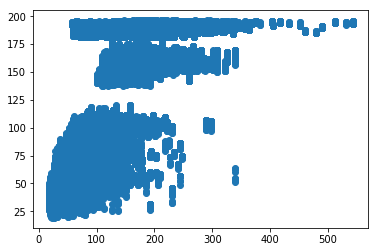

In [76]:
test_predictions = model.predict(test_input.values)
plt.scatter(test_labels.values, test_predictions)
plt.show()